In [1]:
from keras.layers import Dense
from keras.layers import Conv2D,Flatten,Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential

In [2]:
from keras.datasets.cifar10 import load_data
(xtrain,ytrain),(xtest,ytest)=load_data()
print('Train Shape:\t',xtrain.shape,ytrain.shape)
print()
print('Test shape:\t',xtest.shape,ytest.shape)

170498071/170498071 [==============================] - 100s 1us/step
Train Shape:	 (50000, 32, 32, 3) (50000, 1)

Test shape:	 (10000, 32, 32, 3) (10000, 1)


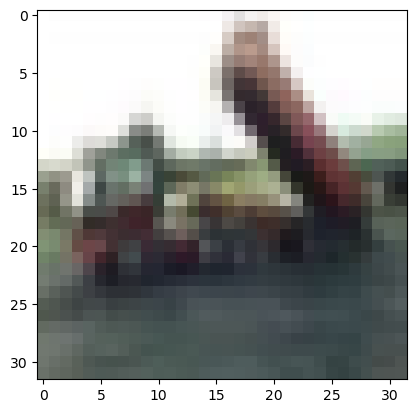

In [4]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[2],cmap='gray')

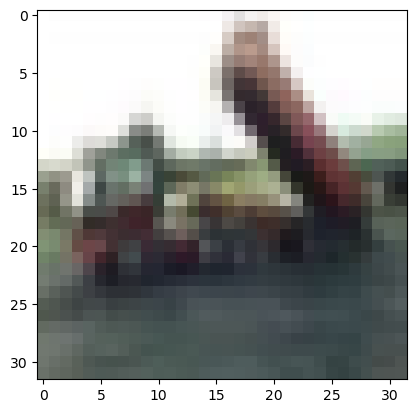

In [5]:
plt.imshow(xtrain[2],cmap='gray_r')

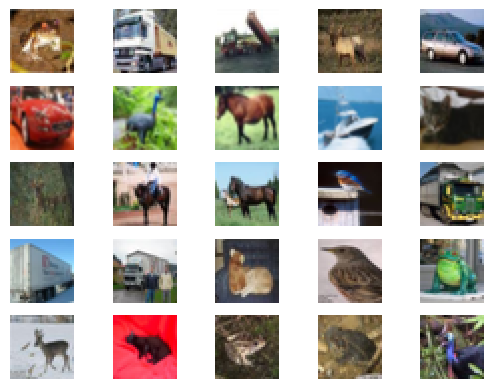

In [6]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(xtrain[i],cmap='gray_r')
plt.show()

In [7]:
def discriminator(in_shape=(32,32,3)):
    model=Sequential()

    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',
                     input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
 
    model.add(Flatten())
    
    model.add(Dense(1,activation='sigmoid'))

    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    
    model.compile(loss='binary_crossentropy',optimizer=opt,
                  metrics=['accuracy'])
                  
    return model
                  
model=discriminator()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [8]:
from numpy import expand_dims,ones,zeros

def load_real_samples():
    (xtrain,_),(_,_)=load_data()
    x=expand_dims(xtrain,axis=-1)
    x=x.astype('float32')
    x=x/255.
    return x

In [9]:
load_real_samples()

array([[[[[0.23137255],
          [0.24313726],
          [0.24705882]],

         [[0.16862746],
          [0.18039216],
          [0.1764706 ]],

         [[0.19607843],
          [0.1882353 ],
          [0.16862746]],

         ...,

         [[0.61960787],
          [0.5176471 ],
          [0.42352942]],

         [[0.59607846],
          [0.49019608],
          [0.4       ]],

         [[0.5803922 ],
          [0.4862745 ],
          [0.40392157]]],


        [[[0.0627451 ],
          [0.07843138],
          [0.07843138]],

         [[0.        ],
          [0.        ],
          [0.        ]],

         [[0.07058824],
          [0.03137255],
          [0.        ]],

         ...,

         [[0.48235294],
          [0.34509805],
          [0.21568628]],

         [[0.46666667],
          [0.3254902 ],
          [0.19607843]],

         [[0.47843137],
          [0.34117648],
          [0.22352941]]],


        [[[0.09803922],
          [0.09411765],
          [0.08235294]],

    

In [10]:
from numpy.random import rand,randint

def generate_real_samples(dataset,n_samples):
    ix=randint(0,dataset.shape[0],n_samples)
    x=dataset[ix]

    y=ones((n_samples,1))
    return x,y

In [11]:
generate_real_samples(load_real_samples(),n_samples=10)

(array([[[[[0.7137255 ],
           [0.6784314 ],
           [0.6392157 ]],
 
          [[0.7882353 ],
           [0.8       ],
           [0.7921569 ]],
 
          [[0.8156863 ],
           [0.8156863 ],
           [0.8156863 ]],
 
          ...,
 
          [[0.7921569 ],
           [0.8       ],
           [0.79607844]],
 
          [[0.8039216 ],
           [0.8156863 ],
           [0.81960785]],
 
          [[0.79607844],
           [0.81960785],
           [0.827451  ]]],
 
 
         [[[0.7294118 ],
           [0.69803923],
           [0.6666667 ]],
 
          [[0.83137256],
           [0.8392157 ],
           [0.827451  ]],
 
          [[0.80784315],
           [0.80784315],
           [0.8117647 ]],
 
          ...,
 
          [[0.7882353 ],
           [0.79607844],
           [0.7882353 ]],
 
          [[0.79607844],
           [0.80784315],
           [0.8117647 ]],
 
          [[0.7921569 ],
           [0.8156863 ],
           [0.8235294 ]]],
 
 
         [[[0.80784315],

In [12]:

def generate_fake_samples(n_samples):
    x=rand(32*32*3*n_samples)
    x=x.reshape(n_samples,32,32,3)
    y=zeros((n_samples,1))
    
    return x,y

In [13]:
generate_fake_samples(10)

(array([[[[2.75099962e-01, 8.05546564e-01, 5.36717435e-01],
          [2.73783353e-01, 4.66218203e-01, 4.37605933e-01],
          [2.65189065e-01, 5.25617917e-01, 8.14009920e-01],
          ...,
          [4.87962566e-01, 4.38219790e-01, 9.74183782e-01],
          [2.98229184e-01, 3.76614692e-01, 6.59894963e-01],
          [8.82325121e-01, 7.57199228e-01, 3.37734261e-01]],
 
         [[5.11731058e-02, 8.00499823e-01, 9.63998953e-02],
          [1.27784205e-01, 8.06674637e-01, 6.37303594e-01],
          [2.54391637e-01, 2.45524129e-01, 5.20364757e-01],
          ...,
          [5.84675183e-01, 8.22699060e-01, 5.63836765e-01],
          [1.97335995e-01, 1.65694011e-03, 7.85522542e-01],
          [1.88543118e-02, 4.79929493e-01, 3.85087675e-01]],
 
         [[9.96336734e-01, 4.71094531e-01, 6.97165185e-01],
          [2.16567131e-01, 7.65862529e-01, 9.98578281e-01],
          [6.27647095e-01, 5.59070550e-01, 6.39727598e-01],
          ...,
          [1.22962099e-01, 3.58747521e-01, 6.3241

In [14]:
def train_discriminative(model,dataset,n_iter=100,n_batch=256):
    half_batch=int(n_batch//2)
    
    for i in range(n_iter):
        xreal,yreal=generate_real_samples(dataset,half_batch)
        AA,real_acc=model.train_on_batch(xreal,yreal)
        xfake,yfake=generate_fake_samples(half_batch)
        BB,fake_acc=model.train_on_batch(xfake,yfake)
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
        

In [15]:
model=discriminator()
dataset=load_real_samples()

In [16]:
train_discriminative(model,dataset)

>1 real=33% fake=38%
>2 real=45% fake=38%
>3 real=48% fake=45%
>4 real=48% fake=41%
>5 real=43% fake=48%
>6 real=50% fake=52%
>7 real=38% fake=53%
>8 real=43% fake=56%
>9 real=47% fake=57%
>10 real=38% fake=57%
>11 real=46% fake=62%
>12 real=34% fake=62%
>13 real=30% fake=65%
>14 real=37% fake=66%
>15 real=43% fake=67%
>16 real=41% fake=75%
>17 real=39% fake=70%
>18 real=30% fake=72%
>19 real=34% fake=74%
>20 real=35% fake=75%
>21 real=38% fake=80%
>22 real=30% fake=81%
>23 real=39% fake=76%
>24 real=30% fake=85%
>25 real=31% fake=80%
>26 real=38% fake=84%
>27 real=35% fake=81%
>28 real=43% fake=85%
>29 real=33% fake=88%
>30 real=39% fake=87%
>31 real=31% fake=89%
>32 real=48% fake=89%
>33 real=37% fake=93%
>34 real=45% fake=94%
>35 real=39% fake=90%
>36 real=38% fake=94%
>37 real=43% fake=91%
>38 real=38% fake=95%
>39 real=39% fake=95%
>40 real=47% fake=94%
>41 real=34% fake=95%
>42 real=41% fake=96%
>43 real=51% fake=96%
>44 real=58% fake=96%
>45 real=58% fake=99%
>46 real=59% fake=1

In [17]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    return model

In [18]:
latent_dim = 100
model = generator(latent_dim)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [19]:

import numpy as np
from numpy.random import randn
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [20]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

1/1 [==============================] - 0s 248ms/step


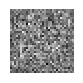

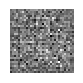

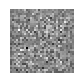

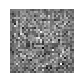

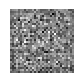

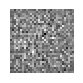

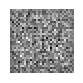

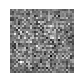

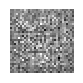

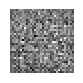

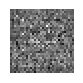

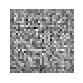

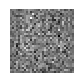

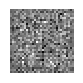

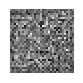

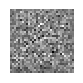

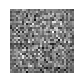

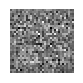

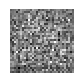

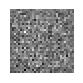

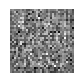

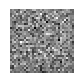

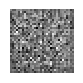

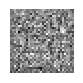

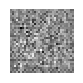

In [21]:
latent_dim = 100
model = generator(latent_dim)
n_samples = 25
x, _ = generate_fake_samples(model, latent_dim, n_samples)
for i in range(n_samples):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(x[i, :, :, 0], cmap='gray_r')

    plt.show()